## Overview

## Business Problem

## Data Understanding
For this analysis, we will utilize the "king County Housing Price from May 2014- May 2015" created by the Center for Spatial Data Science. It contains


In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
from sklearn.feature_selection import RFE, RFECV
from scipy.stats import kurtosis, skew
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error


%matplotlib inline

In [2]:
#ignore pairplot and graph warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
housing = pd.read_csv('data/kc_house_data.csv')
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
housing.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Observations: We have several columns with categorical values
- waterfront      
- view             
- condition       
- grade           
- zipcode

Also the column sqft_basement is an object. Let's find out why.

We have several null values in the waterfont and yr_renovated categories. we have a small number of null values in the view category. Yr_renovated seems self-explanatory - a nan value means that the
house was not renovated. Let's explore the remaining two categories. 


## Data Preparation 

- figuring out how to replace null values in columns
- investigating duplicate id
- creating null columns

In [7]:
housing['id'].value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [8]:
idcheck1 = housing[housing['id'] == 795000620]
idcheck1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,NO,NONE,...,5 Fair,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,NO,NONE,...,5 Fair,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,NaN,NONE,...,5 Fair,1080,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250


In [9]:
idcheck2 = housing[housing['id'] == 1825069031]
idcheck2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3946,1825069031,8/14/2014,550000.0,4,1.75,2410,8447,2.0,NO,GOOD,...,8 Good,2060,350.0,1936,1980.0,98074,47.6499,-122.088,2520,14789
3947,1825069031,10/16/2014,550000.0,4,1.75,2410,8447,2.0,NaN,GOOD,...,8 Good,2060,350.0,1936,1980.0,98074,47.6499,-122.088,2520,14789


In [10]:
print(housing['waterfront'].isna().sum())
housing['waterfront'].value_counts()

2376


NO     19075
YES      146
Name: waterfront, dtype: int64

In [11]:
housing[(housing['waterfront'].isna()) & (housing['view'] == "NONE")]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,NaN,NONE,...,8 Good,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925
23,8091400200,5/16/2014,252700.0,2,1.50,1070,9643,1.0,NaN,NONE,...,7 Average,1070,0.0,1985,NaN,98030,47.3533,-122.166,1220,8386
40,5547700270,7/15/2014,625000.0,4,2.50,2570,5520,2.0,NaN,NONE,...,9 Better,2570,0.0,2000,NaN,98074,47.6145,-122.027,2470,5669
55,9822700295,5/12/2014,885000.0,4,2.50,2830,5000,2.0,NaN,NONE,...,9 Better,2830,0.0,1995,0.0,98105,47.6597,-122.290,1950,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21567,2025049203,6/10/2014,399950.0,2,1.00,710,1157,2.0,NaN,NONE,...,7 Average,710,0.0,1943,0.0,98102,47.6413,-122.329,1370,1173
21578,5087900040,10/17/2014,350000.0,4,2.75,2500,5995,2.0,NaN,NONE,...,8 Good,2500,0.0,2008,0.0,98042,47.3749,-122.107,2530,5988
21586,844000965,6/26/2014,224000.0,3,1.75,1500,11968,1.0,NaN,NONE,...,6 Low Average,1500,0.0,2014,0.0,98010,47.3095,-122.002,1320,11303
21587,7852140040,8/25/2014,507250.0,3,2.50,2270,5536,2.0,NaN,NONE,...,8 Good,2270,0.0,2003,0.0,98065,47.5389,-121.881,2270,5731


In [12]:
housing['waterfront'].fillna(value='NO', inplace=True)

**Waterfront view**

- the only options are yes or no. 
##Any property on a waterfront will have a value other than NONE in the view column. Since there are 2110 rows that have a NaN value in waterfront and a none value in the view column in our data, it seems safer to assume NO as the default for waterfront.##

We can either assume a property with a nan value for waterfront means it is not on the waterfront and replace all the nan values with no, or we can just drop the rows with a nan response. 
Since our data comprises of ~21,600 different rows, if we dropped these 2376 rows, we'd be loosing 
more than 10% of our data. 

So let's keep them and assume a nan response means no waterfront view. 

In [13]:
#454 columns with ? for a value. 
housing['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
602.0         1
1281.0        1
2390.0        1
415.0         1
1024.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [14]:
# create new column sqrt_basement2 which is sqrt_living - sqrt-above. Addresses sqft_basement ? values.
housing['sqft_basement2'] = housing['sqft_living'] - housing['sqft_above']
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement2
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,400
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,910
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


In [15]:
# has 3842 nan values, also has some 0.0 values
print(housing['yr_renovated'].isna().sum())
housing['yr_renovated'].value_counts()

3842


0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [16]:
#creating new column was_renovated. Assuming Nan value and 0.0 - means home was not renovated.
housing['yr_renovated'].fillna(0, inplace=True)
housing['was_renovated'] = housing['yr_renovated'] != 0.0

In [17]:
#replacing 0.0 in yr_renovated column with associated value in yr_built
housing.loc[housing['yr_renovated'] == 0, ['yr_renovated']] = housing['yr_built']

In [18]:
#checking dataframe
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement2,was_renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650,0,False
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,400,True
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062,0,False
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,1965.0,98136,47.5208,-122.393,1360,5000,910,False
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503,0,False


In [19]:
print(housing['view'].isna().sum())
housing['view'].value_counts()

63


NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [20]:
housing['view'].fillna(value='NONE', inplace=True)

**View**

- several options - none, nan, good, excellent, average, and fair.

We can either assume a nan response means no view and replace all the nan values with none, 
or we can just drop the rows with a nan response.  
Since our data comprises of ~21,600 different rows, if we dropped these 63 rows, 
we'd only be loosing 0.3% of our data.

Let's keep them and assume a nan response means no view.

**Sqft_basement**
- created new column to address the '?' values and the 0.0 values.

**Yr_renovated**
- created new column that addresses the 0.0 values and the nan values.

In [21]:
#investigating outlier bedrooms
housing[housing['bedrooms'] > 8]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement2,was_renovated
4092,1997200215,5/7/2014,599999.0,9,4.50,3830,6988,2.5,NO,NONE,...,1380.0,1938,1938.0,98103,47.6927,-122.338,1460,6291,1380,False
4231,2902200015,1/6/2015,700000.0,9,3.00,3680,4400,2.0,NO,NONE,...,850.0,1908,1908.0,98102,47.6374,-122.324,1960,2450,850,False
6073,9822700190,8/8/2014,1280000.0,9,4.50,3650,5000,2.0,NO,NONE,...,1120.0,1915,2010.0,98105,47.6604,-122.289,2510,5000,1120,True
8537,424049043,8/11/2014,450000.0,9,7.50,4050,6504,2.0,NO,NONE,...,0.0,1996,1996.0,98144,47.5923,-122.301,1448,3866,0,False
8748,1773100755,8/21/2014,520000.0,11,3.00,3000,4960,2.0,NO,NONE,...,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960,600,True
13301,627300145,8/14/2014,1150000.0,10,5.25,4590,10920,1.0,NO,AVERAGE,...,2090.0,2008,2008.0,98004,47.5861,-122.113,2730,10400,2090,False
15147,5566100170,10/29/2014,650000.0,10,2.00,3610,11914,2.0,NO,NONE,...,600.0,1958,1958.0,98006,47.5705,-122.175,2040,11914,600,False
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,...,580.0,1947,1947.0,98103,47.6878,-122.331,1330,4700,580,False
16830,8823900290,3/17/2015,1400000.0,9,4.00,4620,5508,2.5,NO,NONE,...,750.0,1915,1915.0,98105,47.6684,-122.309,2710,4320,750,False
18428,8823901445,3/13/2015,934000.0,9,3.00,2820,4480,2.0,NO,NONE,...,940.0,1918,1918.0,98105,47.6654,-122.307,2460,4400,940,False


In [22]:
#replacing 33 bedrooms with 3. we feel confident in assuming this was a typo based on the bathrooms and sqft_living
housing['bedrooms'] = housing['bedrooms'].replace(33, 3)

In [23]:
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement2,was_renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650,0,False
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,400,True
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062,0,False
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,1965.0,98136,47.5208,-122.393,1360,5000,910,False
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503,0,False


In [24]:
##exporting cleaned data frame
housing.to_csv('./data/kc_house_data_cleaned.csv')

In [25]:
#Exported data to QGIS to obtain distance from water column

## Feature Engineering  
Let's further explore some of our variables.

In [26]:
![housing_location](./images/housing_location.png)

/bin/bash: -c: line 0: syntax error near unexpected token `./images/housing_location.png'
/bin/bash: -c: line 0: `[housing_location](./images/housing_location.png)'


In [27]:
![housing_location](./images/housing_location.png)

/bin/bash: -c: line 0: syntax error near unexpected token `./images/housing_location.png'
/bin/bash: -c: line 0: `[housing_location](./images/housing_location.png)'


In [28]:
##using QGIS import create distance from waterbody column.
cleaned_housing = pd.read_csv('data/kc_water_dist_homes.csv')
cleaned_housing.head()

,field_1,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement2,was_renovated,Hub distance_HubDist
0,0,7129300520,2014/10/13,221900,3,1.00,1180,5650,1.0,False,...,1955,1955,98178,47.5112,-122.257,1340,5650,0,False,0.372917
1,1,6414100192,2014/12/09,538000,3,2.25,2570,7242,2.0,False,...,1951,1991,98125,47.7210,-122.319,1690,7639,400,True,0.328945
2,2,5631500400,2015/02/25,180000,2,1.00,770,10000,1.0,False,...,1933,1933,98028,47.7379,-122.233,2720,8062,0,False,0.678380
3,3,2487200875,2014/12/09,604000,4,3.00,1960,5000,1.0,False,...,1965,1965,98136,47.5208,-122.393,1360,5000,910,False,0.070517
4,4,1954400510,2015/02/18,510000,3,2.00,1680,8080,1.0,False,...,1987,1987,98074,47.6168,-122.045,1800,7503,0,False,0.644733


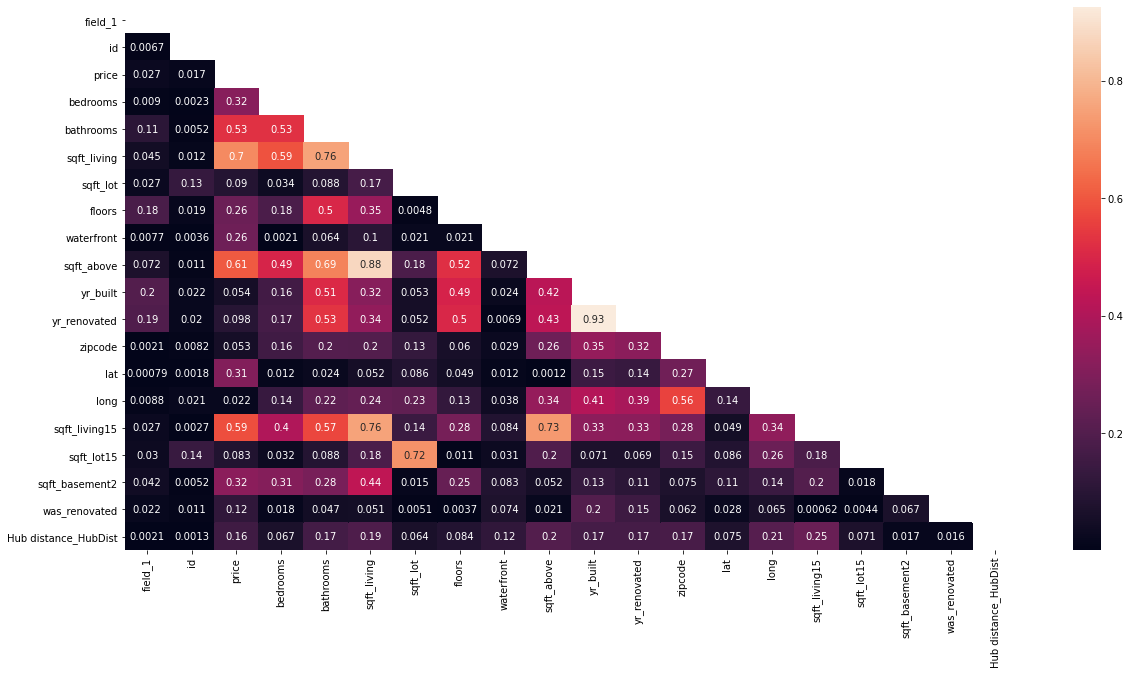

In [29]:
#checking for feature independence
mask = np.triu(np.ones_like(cleaned_housing.corr(), dtype=bool))

plt.figure(figsize=(20,10))

cor = cleaned_housing.corr().abs()
sns.heatmap(cor, mask=mask, annot=True);

In [30]:
cleaned_housing.corr().price.sort_values(ascending=False)

price                   1.000000
sqft_living             0.701917
sqft_above              0.605368
sqft_living15           0.585241
bathrooms               0.525906
sqft_basement2          0.323799
bedrooms                0.315954
lat                     0.306692
waterfront              0.264306
floors                  0.256804
was_renovated           0.117543
yr_renovated            0.097541
sqft_lot                0.089876
sqft_lot15              0.082845
yr_built                0.053953
field_1                 0.027436
long                    0.022036
id                     -0.016772
zipcode                -0.053402
Hub distance_HubDist   -0.156007
Name: price, dtype: float64

In [31]:
## creating new column ratios to adjust for multicollinearity between variables
cleaned_housing['bed_bath_ratio'] = (cleaned_housing['bedrooms'] /  cleaned_housing['bathrooms'])
cleaned_housing['bath_bed_ratio'] = (cleaned_housing['bathrooms'] /  cleaned_housing['bedrooms'])
cleaned_housing['sqft_living_to_bedroom_ratio'] = (cleaned_housing['sqft_living'] /  cleaned_housing['bedrooms'])
cleaned_housing['sqft_living_to_bathroom_ratio'] = (cleaned_housing['sqft_living'] /  cleaned_housing['bathrooms'])
cleaned_housing['ratio_sqft_lot_living'] = (cleaned_housing['sqft_lot'] /  cleaned_housing['sqft_living'])
cleaned_housing['ratio_sqft_living_lot'] = (cleaned_housing['sqft_living'] /  cleaned_housing['sqft_lot'])

In [32]:
cleaned_housing['age_at_sale'] = (cleaned_housing['date'].str[:4].astype(int) - cleaned_housing['yr_built']).astype(int)

cleaned_housing['age_renovation_at_sale'] = (cleaned_housing['date'].str[:4].astype(int) - cleaned_housing['yr_renovated']).astype(int)

In [33]:
#cleaning up column names, changing column to string and dropping columns
cleaned_housing.rename(columns = {'Hub distance_HubDist':'Distance_to_Water'}, inplace = True)
cleaned_housing['zipcode'] = cleaned_housing['zipcode'].astype(str)
cleaned_housing = cleaned_housing.drop(['date'], axis=1)
cleaned_housing = cleaned_housing.drop(['field_1'], axis=1)
cleaned_housing = cleaned_housing.drop(['sqft_basement'], axis=1)

## Target Exploration


In [34]:
min = cleaned_housing['price'].min()
max = cleaned_housing['price'].max()
mean = cleaned_housing['price'].mean()

print (f"The sale price range of homes sold is {min} to {max}")
print (f"The mean sale price of homes was {mean}")

The sale price range of homes sold is 78000 to 7700000
The mean sale price of homes was 540296.5735055795


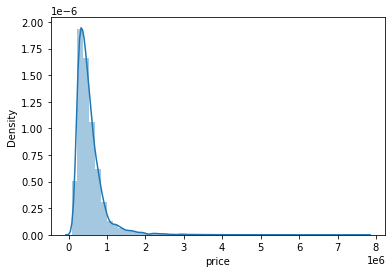

In [35]:
sns.distplot(cleaned_housing['price']);

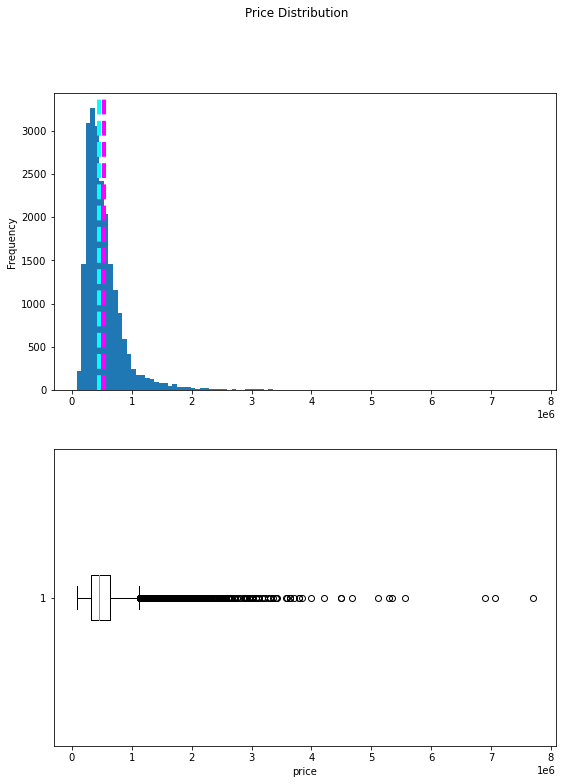

In [36]:
label = cleaned_housing['price']
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=4)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=4)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('price')
fig.suptitle('Price Distribution');

In [37]:
print ('Skewness =', stats.skew(cleaned_housing['price']))
print ('Kurtosis =', stats.kurtosis(cleaned_housing['price']))

Skewness = 4.023085207745834
Kurtosis = 34.53308449607733


- price is normally distributed but has a significant right tail skew.
- Since the peak of the distribution is to the left of our mean, price is positively skewed.    
- This means that more than half of the houses in our dataset sold for less than the average price $540,000. 
- Our kurtosis and skew are high - we expect to see a positive skew and tail.
- Looking at our box plot - this illustrates that clearly - we have a number of outliers that sold for 
  significantly more than our average.
- Moving forward, we will need to account for some of this skewdness in our models

# Modeling

## Train Test Split 

In [38]:
#Setting up train test split
X = cleaned_housing.drop(['price'], axis=1)
y = cleaned_housing['price']

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=57)

In [39]:
#Combining splits to get test and train complete df's
train_df = pd.concat([y_train, X_train], axis=1)
test_df = pd.concat([y_test, X_test], axis=1)

## Baseline Model (Simple Regression Models)

### Simple Regression Model

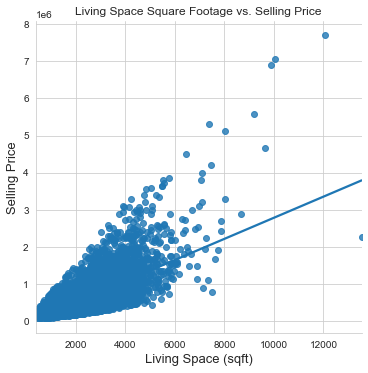

In [40]:
#our most correlated feature is sqft_living. Let's take a look at this visually.
sns.set_style('whitegrid')

sns.lmplot(x ='sqft_living', y ='price',ci=None, data = train_df).set(title='Living Space Square Footage vs. Selling Price')
plt.xlabel("Living Space (sqft)", fontsize = 13)
plt.ylabel("Selling Price", fontsize = 13);



In [41]:
#using subset of train df

simple_df = train_df.filter(['price', 'sqft_living'], axis=1)
simple_model = sm.formula.ols('price ~ sqft_living',simple_df).fit()
simple_model_summary = simple_model.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 1.486e+04
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        03:07:54   Log-Likelihood:            -2.1013e+05
No. Observations:               15117   AIC:                         4.203e+05
Df Residuals:                   15115   BIC:                         4.203e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.065e+04   5301.658     -9.554      0.000    -6.1e+04   -4.03e+04
sqft_living   283.8736      2.329    121.883      0.000     279.308     288.439
==============================================================================
Omnibus:                    10808.623   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           470973.629
Skew:                           2.943   Prob(JB):                         0.00
Kurtosis:                      29.704   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

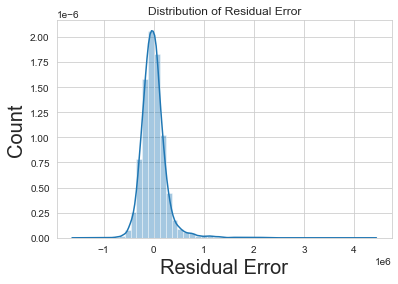

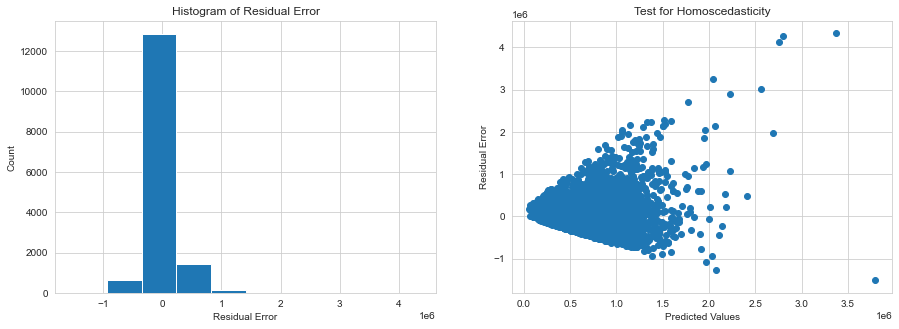

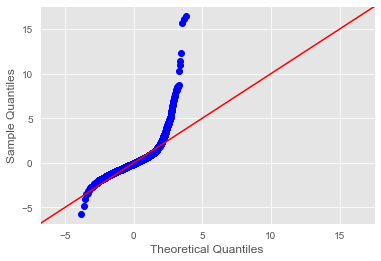

In [42]:
p = sns.distplot(simple_model.resid);
plt.xlabel("Residual Error", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
p.set_title("Distribution of Residual Error");

resid = simple_model.resid

fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].hist(resid)
ax[0].set_xlabel("Residual Error")
ax[0].set_ylabel("Count")
ax[0].set_title(label="Histogram of Residual Error");

ax[1].scatter(x=simple_model.fittedvalues,y=resid)
ax[1].set_xlabel("Predicted Values")
ax[1].set_ylabel("Residual Error")
ax[1].set_title(label="Test for Homoscedasticity")

plt.style.use('ggplot')
fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True);

In [43]:
print(f'R-squared training model is {round(simple_model.rsquared,2)}')
print(f'P-Value training model is {simple_model.f_pvalue}')
print(f'Price standard error training model is {round(simple_model.bse,0)[0]}')
print(f'sqft_living coef training model is {round(simple_model.params[1])}')


R-squared training model is 0.5
P-Value training model is 0.0
Price standard error training model is 5302.0
sqft_living coef training model is 284.0


### Simple Regression Model - refining

In [44]:
#Model 1 - Simple Regression 2
#using subset of train_df. 
#refining model by dropping price values that are +3std away from the mean.

simple_std = simple_df['price'].std()
simple_mean = simple_df['price'].mean()
simple_drop = (simple_std *3) + simple_mean
simple_drop

1652910.732318603

In [45]:
#dropping rows where homes sold for more than 3 std away from the mean
simple_df.drop(simple_df[ simple_df['price'] >= 1652910 ].index, inplace = True)

In [46]:
simple_model2 = sm.formula.ols('price ~ sqft_living',simple_df).fit()
simple_model2_summary = simple_model2.summary()
simple_model2_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                 1.173e+04
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        03:07:56   Log-Likelihood:            -2.0173e+05
No. Observations:               14838   AIC:                         4.035e+05
Df Residuals:                   14836   BIC:                         4.035e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.566e+04   4205.332     20.370      0.000    7.74e+04    9.39e+04
sqft_living   207.2061      1.913    108.318      0.000     203.457     210.956
==============================================================================
Omnibus:                     2467.007   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5326.670
Skew:                           0.982   Prob(JB):                         0.00
Kurtosis:                       5.182   Cond. No.                     5.80e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
print(f'R-squared training model is {round(simple_model.rsquared,2)}')
print(f'P-Value training model is {simple_model.f_pvalue}')
print(f'Price standard error training model is {round(simple_model.bse,0)[0]}')
print(f'sqft_living coef training model is {round(simple_model.params[1])}')
print()
print(f'R-squared simple_model2 is {round(simple_model.rsquared,2)}')
print(f'P-Value simple_model2 is {simple_model.f_pvalue}')
print(f'Price standard error simple_model2 is {round(simple_model.bse,0)[0]}')
print(f'sqft_living coef simple_model2 is {round(simple_model.params[1])}')

R-squared training model is 0.5
P-Value training model is 0.0
Price standard error training model is 5302.0
sqft_living coef training model is 284.0

R-squared simple_model2 is 0.5
P-Value simple_model2 is 0.0
Price standard error simple_model2 is 5302.0
sqft_living coef simple_model2 is 284.0


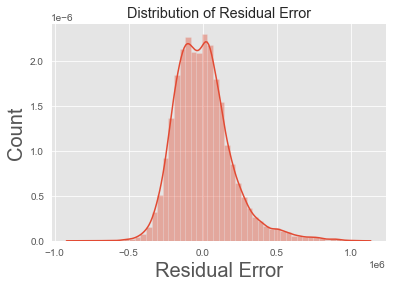

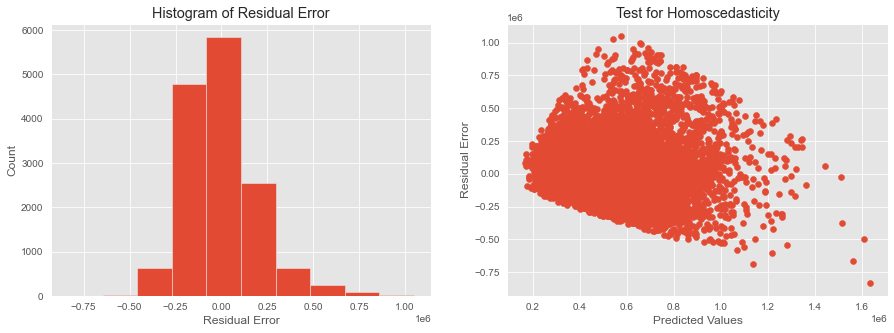

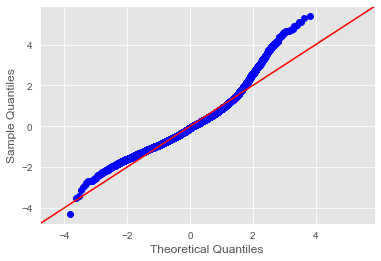

In [48]:
p = sns.distplot(simple_model2.resid);
plt.xlabel("Residual Error", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
p.set_title("Distribution of Residual Error");

resid = simple_model2.resid

fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].hist(resid)
ax[0].set_xlabel("Residual Error")
ax[0].set_ylabel("Count")
ax[0].set_title(label="Histogram of Residual Error");

ax[1].scatter(x=simple_model2.fittedvalues,y=resid)
ax[1].set_xlabel("Predicted Values")
ax[1].set_ylabel("Residual Error")
ax[1].set_title(label="Test for Homoscedasticity")

plt.style.use('ggplot')
fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True);

In [49]:
#taking the log of our target variable price
logprice = np.log(simple_df['price'])
simple_model3 = sm.formula.ols('logprice ~ sqft_living',simple_df).fit()
simple_model3_summary = simple_model3.summary()
simple_model3_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.080e+04
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        03:07:57   Log-Likelihood:                -6216.5
No. Observations:               14838   AIC:                         1.244e+04
Df Residuals:                   14836   BIC:                         1.245e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.2529      0.008   1538.047      0.000      12.237      12.268
sqft_living     0.0004   3.62e-06    103.913      0.000       0.000       0.000
==============================================================================
Omnibus:                       84.734   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.767
Skew:                          -0.026   Prob(JB):                     6.38e-14
Kurtosis:                       2.691   Cond. No.                     5.80e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
print(f'R-squared training model is {round(simple_model.rsquared,2)}')
print(f'P-Value training model is {simple_model.f_pvalue}')
print(f'Price standard error training model is {round(simple_model.bse,0)[0]}')
print(f'sqft_living coef training model is {round(simple_model.params[1])}')
print()
print(f'R-squared simple_model2 is {round(simple_model2.rsquared,2)}')
print(f'P-Value simple_model2 is {simple_model2.f_pvalue}')
print(f'Price standard error simple_model2 is {round(simple_model2.bse,0)[0]}')
print(f'sqft_living coef simple_model2 is {round(simple_model2.params[1])}')
print()
print(f'R-squared simple_model3 is {round(simple_model3.rsquared,2)}')
print(f'P-Value simple_model3 is {simple_model3.f_pvalue}')
print(f'Price standard error simple_model3 is {round(simple_model3.bse,0)[0]}')
print(f'sqft_living coef simple_model3 is {round(simple_model3.params[1])}')

R-squared training model is 0.5
P-Value training model is 0.0
Price standard error training model is 5302.0
sqft_living coef training model is 284.0

R-squared simple_model2 is 0.44
P-Value simple_model2 is 0.0
Price standard error simple_model2 is 4205.0
sqft_living coef simple_model2 is 207.0

R-squared simple_model3 is 0.42
P-Value simple_model3 is 0.0
Price standard error simple_model3 is 0.0
sqft_living coef simple_model3 is 0.0


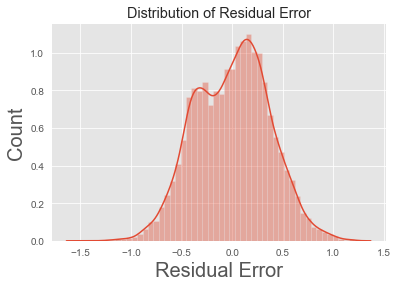

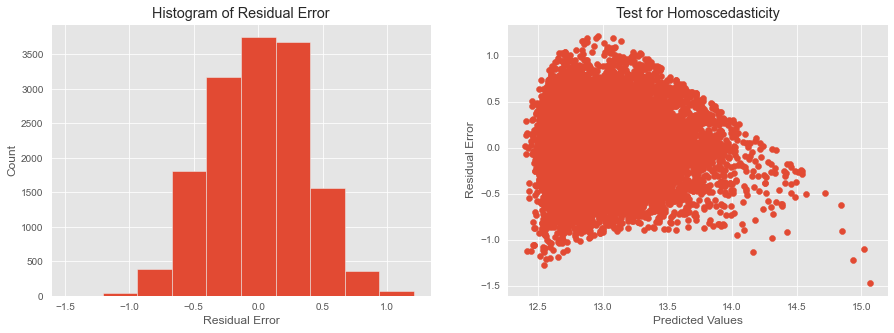

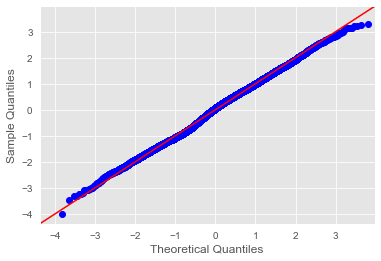

In [51]:
p = sns.distplot(simple_model3.resid);
plt.xlabel("Residual Error", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
p.set_title("Distribution of Residual Error");

resid = simple_model3.resid

fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].hist(resid)
ax[0].set_xlabel("Residual Error")
ax[0].set_ylabel("Count")
ax[0].set_title(label="Histogram of Residual Error");

ax[1].scatter(x=simple_model3.fittedvalues,y=resid)
ax[1].set_xlabel("Predicted Values")
ax[1].set_ylabel("Residual Error")
ax[1].set_title(label="Test for Homoscedasticity")

plt.style.use('ggplot')
fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True);

## Observations
- Our intial model gives the following formula : y = 284 * ('sqft_living') - 50,650.
- Sqft_living accounts for about 50% on average of the variance in our sale price.
- Each unit increase of Sqft_living increases the selling price of homes by on average about $284.
- We noticed that our model was not meeting the Homoskedasticity or normal error distribution assumptions so we tried   a few iterations to account for this.
- Model assumptions:
    1. linearity between feature and target variable - illustrated by positive correlation of 0.702
    2. low multicolinearity between target and feature variable - the lowest condition number we achieved was 5,630 - 
        so this assumption wasnt met.
    3. normally distributed errors with a mean of 0. 
       the QQ plot and histogram from model 1 show a significant right tail skew. The plots from iterations 2 and 3
       show a normal distribution. 
    4. Homoskedasticity - variance is constant. Assumption was met in our model iterations 2 and 3.
    5. Errors are not correlated.
    
- Our R2 actually decreased with each successive iteration. When comparing this base model to our multiple regression 
  models we'll use the average R2 of 0.45.   

## Dummy Regressor

In [52]:
#DummyRegressor scores for train and test sets
dummy_lr = DummyRegressor()
dummy_lr.fit(X_train, y_train)

print("Dummy Regressor Model:")

print(dummy_lr.score(X_train, y_train))
print(dummy_lr.score(X_test, y_test))




Dummy Regressor Model:
0.0
-1.9627021792256727e-06


## Multiple Regression Model

In [53]:
# for our first multiple regression let's take a look at all our numeric columns.
#Recalling our X_train and y_train df's from our previous split
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15117 entries, 20406 to 3023
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             15117 non-null  int64  
 1   bedrooms                       15117 non-null  int64  
 2   bathrooms                      15117 non-null  float64
 3   sqft_living                    15117 non-null  int64  
 4   sqft_lot                       15117 non-null  int64  
 5   floors                         15117 non-null  float64
 6   waterfront                     15117 non-null  bool   
 7   view                           15117 non-null  object 
 8   condition                      15117 non-null  object 
 9   grade                          15117 non-null  object 
 10  sqft_above                     15117 non-null  int64  
 11  yr_built                       15117 non-null  int64  
 12  yr_renovated                   15117 non-nu

In [54]:
#creating new numeric df from our train split
X_train_numeric =X_train.filter(['bedrooms','bathrooms','sqft_living','sqft_lot','floors',
                                    'sqft_above','yr_built','yr_renovated','lat','long','sqft_living15',
                                    'sqft_lot15','sqft_basement2','Distance_to_Water' ], axis=1)
X_train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15117 entries, 20406 to 3023
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedrooms           15117 non-null  int64  
 1   bathrooms          15117 non-null  float64
 2   sqft_living        15117 non-null  int64  
 3   sqft_lot           15117 non-null  int64  
 4   floors             15117 non-null  float64
 5   sqft_above         15117 non-null  int64  
 6   yr_built           15117 non-null  int64  
 7   yr_renovated       15117 non-null  int64  
 8   lat                15117 non-null  float64
 9   long               15117 non-null  float64
 10  sqft_living15      15117 non-null  int64  
 11  sqft_lot15         15117 non-null  int64  
 12  sqft_basement2     15117 non-null  int64  
 13  Distance_to_Water  15117 non-null  float64
dtypes: float64(5), int64(9)
memory usage: 1.7 MB


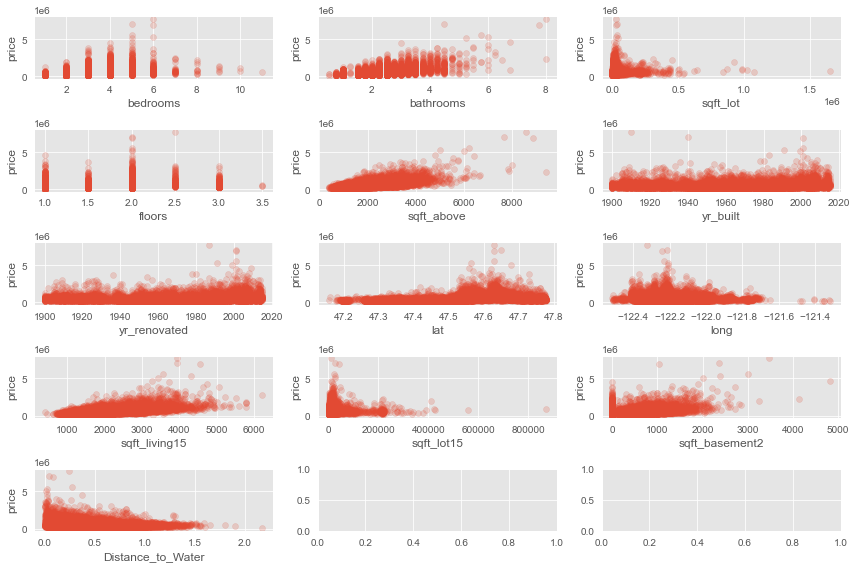

In [55]:
#evaluating numeric features
scatterplot_data = X_train_numeric.drop("sqft_living", axis=1) #already graphed above

fig, axes = plt.subplots(ncols=3, nrows=5, figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X_train_numeric[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("price")

### Muliple Regression Model 1

In [56]:
multi_model = LinearRegression()
##performing 3 separate train/tets splits on our X_train, y_train
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)
#performing regression on all columns in our dataset
multi_model_scores = cross_validate(
    estimator=multi_model,
    X=X_train_numeric,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", multi_model_scores["train_score"].mean())
print("Validation score:", multi_model_scores["test_score"].mean())


Current Model
Train score:      0.6334429950650038
Validation score: 0.6099003027567912


- with an r2 of 0.61 ( validation score) is higher than the 0.45 mean r2 from our simple model, 
- we need to see more information about our multicollinearity, pvalues, and coeficients. Lets run the regression 
- with the statsmodel method to ensure we can check the condition number


In [57]:
sm.OLS(y_train, sm.add_constant(X_train_numeric)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     1967.
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        03:08:05   Log-Likelihood:            -2.0781e+05
No. Observations:               15117   AIC:                         4.157e+05
Df Residuals:                   15103   BIC:                         4.158e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5.646e+07   2.09e+06    -27.053      0.000   -6.06e+07   -5.24e+07
bedrooms          -6.137e+04   2587.515    -23.719      0.000   -6.64e+04   -5.63e+04
bathrooms          6.734e+04   4407.207     15.280      0.000    5.87e+04     7.6e+04
sqft_living         162.5260      2.892     56.198      0.000     156.857     168.195
sqft_lot              0.2131      0.063      3.385      0.001       0.090       0.336
floors             1.331e+04   4775.682      2.787      0.005    3950.231    2.27e+04
sqft_above          100.3021      2.862     35.046      0.000      94.692     105.912
yr_built          -3573.0929    173.435    -20.602      0.000   -3913.046   -3233.140
yr_renovated       1211.7139    177.145      6.840      0.000     864.488    1558.940
lat                5.966e+05   1.38e+04     43.128      0.000     5.7e+05    6.24e+05
long              -2.672e+05   1.58e+04    -16.886      0.000   -2.98e+05   -2.36e+05
sqft_living15        79.0523      4.423     17.875      0.000      70.383      87.721
sqft_lot15           -0.4657      0.100     -4.647      0.000      -0.662      -0.269
sqft_basement2       62.2206      3.496     17.797      0.000      55.368      69.073
Distance_to_Water  -6.63e+04   7009.058     -9.460      0.000      -8e+04   -5.26e+04
==============================================================================
Omnibus:                    12559.338   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           942202.787
Skew:                           3.529   Prob(JB):                         0.00
Kurtosis:                      41.027   Cond. No.                     1.87e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.12e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- several things are of note - our condition number is really high indicating an issue with multicollinearity
  which is expected - considering we threw everything at this model. We know that there is some multicollinearity
  between some of our sqft variable.
- Interestingly, all our variables are statistically significant at an alpha=.05 level.
- our coefficients are all very different, which makes interpretating this model difficult.
- Lets try removing some variables and scaling our data so we can have our coefficients in the same scale.
- To do this we'll use the recursive feature module from sklearn

In [58]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select =4)

ss = StandardScaler()
ss.fit(X_train_numeric)
X_train_numeric_scaled = ss.transform(X_train_numeric)
select.fit(X= X_train_numeric_scaled, y=y_train)
select.support_

array([False, False,  True, False, False,  True, False, False,  True,
       False, False, False,  True, False])

In [59]:
X_train_numeric.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_basement2', 'Distance_to_Water'],
      dtype='object')

- With Recursive Feature Elimination - we're selecting the top 4 features to include in our model
   these are sqft_living, sqft_above, latitude, and sqft_basement
- we've also scaled our features so our coefficients should be more interpretable. 
- Lets run another regression model with these four features included.

### Muliple Regression Model 1b

In [60]:
#creating new df with only the relevant 4 columns
X_train_numeric2 = X_train.filter(['sqft_living','sqft_above','lat','sqft_basement2'], axis=1)

multi_model_b = LinearRegression()
##performing 3 separate train/tets splits on our X_train, y_train
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)
#performing regression on all columns in our dataset
multi_model_b_scores = cross_validate(
    estimator=multi_model_b,
    X=X_train_numeric2,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", multi_model_b_scores["train_score"].mean())
print("Validation score:", multi_model_b_scores["test_score"].mean())
print()
print("Previous Model")
print("Train score:     ", multi_model_scores["train_score"].mean())
print("Validation score:", multi_model_scores["test_score"].mean())

Current Model
Train score:      0.57246679345766
Validation score: 0.5528461425859618

Previous Model
Train score:      0.6334429950650038
Validation score: 0.6099003027567912


In [61]:
##lets scale our X_train_numeric2 dataframe
ss = StandardScaler()
ss.fit(X_train_numeric2)
X_train_numeric2_scaled = ss.transform(X_train_numeric2)

In [62]:
##using OLS to investigate unexpected result
sm.OLS(y_train, sm.add_constant(X_train_numeric2_scaled)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     6637.
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        03:08:06   Log-Likelihood:            -2.0895e+05
No. Observations:               15117   AIC:                         4.179e+05
Df Residuals:                   15113   BIC:                         4.179e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.404e+05   1981.417    272.758      0.000    5.37e+05    5.44e+05
x1          1.304e+05   1013.287    128.702      0.000    1.28e+05    1.32e+05
x2          1.136e+05   1252.158     90.729      0.000    1.11e+05    1.16e+05
x3          1.004e+05   1992.771     50.383      0.000    9.65e+04    1.04e+05
x4          5.844e+04   1795.691     32.545      0.000    5.49e+04     6.2e+04
==============================================================================
Omnibus:                    12580.733   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           846029.369
Skew:                           3.580   Prob(JB):                         0.00
Kurtosis:                      38.943   Cond. No.                     1.62e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.13e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- with the columns we selected (3 sqft representations) - the multicollinearity is expected 
- lets try implementing some of our nonnumeric data to see if more of these features become relevant, so we can
   drop the 1 or 2 of the square footage features.

### Feature Engineering for Muliple Regression Model 2 

-lets encode one of our categorical values - waterfront
-lets also include some columns we calculated earlier - the ratio columns, and the age at sale.
-try regression using some domain knowledge.

In [63]:
X_train['waterfront'].value_counts()

False    15008
True       109
Name: waterfront, dtype: int64

In [64]:
#take boolean column of 'waterfront' and encode
waterfront_train = X_train[["waterfront"]]
encoder_waterfront = OrdinalEncoder()
encoder_waterfront.fit(waterfront_train)
encoder_waterfront.categories_[0]

array([False,  True])

In [65]:
waterfront_encoded_train = encoder_waterfront.transform(waterfront_train)
waterfront_encoded_train = waterfront_encoded_train.flatten()
waterfront_encoded_train

array([0., 0., 0., ..., 0., 0., 0.])

In [66]:
#sanity check
X_train["waterfront"] = waterfront_encoded_train
X_train.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,was_renovated,Distance_to_Water,bed_bath_ratio,bath_bed_ratio,sqft_living_to_bedroom_ratio,sqft_living_to_bathroom_ratio,ratio_sqft_lot_living,ratio_sqft_living_lot,age_at_sale,age_renovation_at_sale
20406,6788200596,4,3.5,3440,3800,3.0,0.0,NONE,Average,9 Better,...,False,0.184728,1.142857,0.875,860.0,982.857143,1.104651,0.905263,0,0
13931,3223059141,2,1.0,1420,81892,1.0,0.0,NONE,Average,7 Average,...,False,0.403674,2.000000,0.500,710.0,1420.000000,57.670423,0.017340,58,58
4361,2767705010,4,2.0,1940,5000,1.0,0.0,NONE,Good,7 Average,...,False,0.795404,2.000000,0.500,485.0,970.000000,2.577320,0.388000,104,104
1505,2214800270,4,2.5,2770,7000,1.0,0.0,NONE,Good,7 Average,...,False,0.761639,1.600000,0.625,692.5,1108.000000,2.527076,0.395714,35,35
7978,510001280,4,2.0,2190,4560,2.5,0.0,NONE,Very Good,8 Good,...,False,0.615517,2.000000,0.500,547.5,1095.000000,2.082192,0.480263,104,104


In [67]:
X_train['waterfront'].value_counts()

0.0    15008
1.0      109
Name: waterfront, dtype: int64

In [68]:
X_train['was_renovated'].value_counts()

False    14609
True       508
Name: was_renovated, dtype: int64

In [69]:
#take boolean column of 'was_renovated' and encode
was_renovated_train = X_train[["was_renovated"]]
encoder_was_renovated = OrdinalEncoder()
encoder_was_renovated.fit(was_renovated_train)
was_renovated_encoded_train = encoder_was_renovated.transform(was_renovated_train)
was_renovated_encoded_train = was_renovated_encoded_train.flatten()
was_renovated_encoded_train
#replacing in X_train
X_train["was_renovated"] = was_renovated_encoded_train
X_train.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,was_renovated,Distance_to_Water,bed_bath_ratio,bath_bed_ratio,sqft_living_to_bedroom_ratio,sqft_living_to_bathroom_ratio,ratio_sqft_lot_living,ratio_sqft_living_lot,age_at_sale,age_renovation_at_sale
20406,6788200596,4,3.5,3440,3800,3.0,0.0,NONE,Average,9 Better,...,0.0,0.184728,1.142857,0.875,860.0,982.857143,1.104651,0.905263,0,0
13931,3223059141,2,1.0,1420,81892,1.0,0.0,NONE,Average,7 Average,...,0.0,0.403674,2.000000,0.500,710.0,1420.000000,57.670423,0.017340,58,58
4361,2767705010,4,2.0,1940,5000,1.0,0.0,NONE,Good,7 Average,...,0.0,0.795404,2.000000,0.500,485.0,970.000000,2.577320,0.388000,104,104
1505,2214800270,4,2.5,2770,7000,1.0,0.0,NONE,Good,7 Average,...,0.0,0.761639,1.600000,0.625,692.5,1108.000000,2.527076,0.395714,35,35
7978,510001280,4,2.0,2190,4560,2.5,0.0,NONE,Very Good,8 Good,...,0.0,0.615517,2.000000,0.500,547.5,1095.000000,2.082192,0.480263,104,104


In [70]:
X_train['was_renovated'].value_counts()

0.0    14609
1.0      508
Name: was_renovated, dtype: int64

In [71]:
X_train['zipcode'].value_counts()

98038    430
98103    425
98115    424
98052    407
98034    385
        ... 
98109     74
98010     63
98024     57
98148     42
98039     39
Name: zipcode, Length: 70, dtype: int64

In [72]:
X_train['condition'].value_counts()

Average      9794
Good         3971
Very Good    1217
Fair          118
Poor           17
Name: condition, dtype: int64

In [73]:
#lets drop all columns we're not using,
X_train.drop(X_train.columns[[5, 7, 9,14, 15, 16, 17]], axis = 1, inplace = True)
#sanity check
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15117 entries, 20406 to 3023
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             15117 non-null  int64  
 1   bedrooms                       15117 non-null  int64  
 2   bathrooms                      15117 non-null  float64
 3   sqft_living                    15117 non-null  int64  
 4   sqft_lot                       15117 non-null  int64  
 5   waterfront                     15117 non-null  float64
 6   condition                      15117 non-null  object 
 7   sqft_above                     15117 non-null  int64  
 8   yr_built                       15117 non-null  int64  
 9   yr_renovated                   15117 non-null  int64  
 10  zipcode                        15117 non-null  object 
 11  sqft_basement2                 15117 non-null  int64  
 12  was_renovated                  15117 non-nu

In [74]:
#create dummy variables for the "condition" and "zipcode" columns
condition_dummies = pd.get_dummies(X_train['condition'], drop_first=True)
zipcode_dummies = pd.get_dummies(X_train['zipcode'], drop_first=True)

In [75]:
X_train = pd.concat([X_train, condition_dummies, zipcode_dummies], axis=1)
X_train.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,sqft_above,yr_built,yr_renovated,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
20406,6788200596,4,3.5,3440,3800,0.0,Average,3440,2014,2014,...,0,0,0,0,0,0,0,0,0,0
13931,3223059141,2,1.0,1420,81892,0.0,Average,1180,1956,1956,...,0,0,0,0,0,0,0,0,0,0
4361,2767705010,4,2.0,1940,5000,0.0,Good,980,1910,1910,...,0,0,0,0,0,0,0,0,0,0
1505,2214800270,4,2.5,2770,7000,0.0,Good,1940,1979,1979,...,0,0,0,0,0,0,0,0,0,0
7978,510001280,4,2.0,2190,4560,0.0,Very Good,2190,1910,1910,...,0,0,0,0,0,0,0,0,0,0


In [76]:
#dropping non-numeric columns
X_train.drop(['condition', 'zipcode'], axis = 1, inplace = True)

In [77]:
X_train.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront',
       'sqft_above', 'yr_built', 'yr_renovated', 'sqft_basement2',
       'was_renovated', 'Distance_to_Water', 'bed_bath_ratio',
       'bath_bed_ratio', 'sqft_living_to_bedroom_ratio',
       'sqft_living_to_bathroom_ratio', 'ratio_sqft_lot_living',
       'ratio_sqft_living_lot', 'age_at_sale', 'age_renovation_at_sale',
       'Fair', 'Good', 'Poor', 'Very Good', '98002', '98003', '98004', '98005',
       '98006', '98007', '98008', '98010', '98011', '98014', '98019', '98022',
       '98023', '98024', '98027', '98028', '98029', '98030', '98031', '98032',
       '98033', '98034', '98038', '98039', '98040', '98042', '98045', '98052',
       '98053', '98055', '98056', '98058', '98059', '98065', '98070', '98072',
       '98074', '98075', '98077', '98092', '98102', '98103', '98105', '98106',
       '98107', '98108', '98109', '98112', '98115', '98116', '98117', '98118',
       '98119', '98122', '98125', '98126',

### Final Model 
- Now that we've encoded our condition, zipcode, renovation, and waterfront features. Lets throw everything all our     features and analyze our results 
- Lets also scale our X_train to be able to interpret our coefficents with a little more ease
- Still using cross validate to split our training set into three.

In [78]:
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)

In [79]:
multi_model2 = LinearRegression()
##performing 3 separate train/tets splits on our X_train, y_train
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)
#performing regression on all columns in our dataset
multi_model2_scores = cross_validate(
    estimator=multi_model2,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", multi_model2_scores["train_score"].mean())
print("Validation score:", multi_model2_scores["test_score"].mean())
print()
print("Model 1")
print("Train score:     ", multi_model_scores["train_score"].mean())
print("Validation score:", multi_model_scores["test_score"].mean())
print()
print("Model 1B")
print("Train score:     ", multi_model_b_scores["train_score"].mean())
print("Validation score:", multi_model_b_scores["test_score"].mean())

Current Model
Train score:      0.8141529737928099
Validation score: 0.7905858558925428

Model 1
Train score:      0.6334429950650038
Validation score: 0.6099003027567912

Model 1B
Train score:      0.57246679345766
Validation score: 0.5528461425859618


In [80]:
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,yr_built,yr_renovated,sqft_basement2,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
20406,6788200596,4,3.50,3440,3800,0.0,3440,2014,2014,0,...,0,0,0,0,0,0,0,0,0,0
13931,3223059141,2,1.00,1420,81892,0.0,1180,1956,1956,240,...,0,0,0,0,0,0,0,0,0,0
4361,2767705010,4,2.00,1940,5000,0.0,980,1910,1910,960,...,0,0,0,0,0,0,0,0,0,0
1505,2214800270,4,2.50,2770,7000,0.0,1940,1979,1979,830,...,0,0,0,0,0,0,0,0,0,0
7978,510001280,4,2.00,2190,4560,0.0,2190,1910,1910,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19535,5028602020,3,2.25,1850,7151,0.0,1850,1989,1989,0,...,0,0,0,0,0,0,0,0,0,0
12694,8019200845,2,1.00,1020,15000,0.0,1020,1933,1933,0,...,0,0,0,0,1,0,0,0,0,0
3077,4027700853,6,2.00,2400,7684,0.0,1200,1932,2005,1200,...,0,0,0,0,0,0,0,0,0,0
11990,7852150200,3,2.50,1700,6396,0.0,1700,2003,2003,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
#Huge jump in our validation score. Let's checkout multicollinearity 
sm.OLS(y_train, sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     703.7
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        03:08:11   Log-Likelihood:            -2.0275e+05
No. Observations:               15117   AIC:                         4.057e+05
Df Residuals:                   15025   BIC:                         4.064e+05
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -6.422e+07    5.7e+06    -11.260      0.000   -7.54e+07    -5.3e+07
id                             8.045e-08    4.8e-07      0.168      0.867    -8.6e-07    1.02e-06
bedrooms                      -1.442e+05   4690.885    -30.733      0.000   -1.53e+05   -1.35e+05
bathrooms                      4.132e+04   9795.411      4.218      0.000    2.21e+04    6.05e+04
sqft_living                     264.9279      5.813     45.577      0.000     253.534     276.321
sqft_lot                         -0.5612      0.072     -7.763      0.000      -0.703      -0.419
waterfront                     8.102e+05   1.63e+04     49.731      0.000    7.78e+05    8.42e+05
sqft_above                      159.7496      3.241     49.290      0.000     153.397     166.102
yr_built                       1.523e+04   1423.721     10.701      0.000    1.24e+04     1.8e+04
yr_renovated                   1.668e+04   1423.857     11.718      0.000    1.39e+04    1.95e+04
sqft_basement2                  104.8306      3.643     28.772      0.000      97.689     111.972
was_renovated                 -1.211e+04   1.83e+04     -0.661      0.509    -4.8e+04    2.38e+04
Distance_to_Water             -7.185e+04   5543.173    -12.962      0.000   -8.27e+04    -6.1e+04
bed_bath_ratio                 1.715e+05   5919.594     28.974      0.000     1.6e+05    1.83e+05
bath_bed_ratio                -1.452e+05   2.89e+04     -5.025      0.000   -2.02e+05   -8.85e+04
sqft_living_to_bedroom_ratio     18.4770     33.375      0.554      0.580     -46.941      83.895
sqft_living_to_bathroom_ratio  -392.5034     16.033    -24.481      0.000    -423.930    -361.076
ratio_sqft_lot_living          1567.5815    140.124     11.187      0.000    1292.921    1842.241
ratio_sqft_living_lot         -9.298e+04   7490.904    -12.413      0.000   -1.08e+05   -7.83e+04
age_at_sale                    1.661e+04   1422.677     11.678      0.000    1.38e+04    1.94e+04
age_renovation_at_sale         1.516e+04   1422.700     10.659      0.000    1.24e+04     1.8e+04
Fair                          -2.337e+04   1.52e+04     -1.536      0.125   -5.32e+04    6452.284
Good                           2.737e+04   3447.989      7.938      0.000    2.06e+04    3.41e+04
Poor                          -9.957e+04   3.96e+04     -2.512      0.012   -1.77e+05   -2.19e+04
Very Good                      6.669e+04   5432.672     12.276      0.000     5.6e+04    7.73e+04
98002                          1.801e+04    1.7e+04      1.057      0.291   -1.54e+04    5.14e+04
98003                           751.8356    1.5e+04      0.050      0.960   -2.86e+04    3.01e+04
98004                          7.913e+05   1.52e+04     51.985      0.000    7.61e+05    8.21e+05
98005                          3.443e+05   1.

In [82]:
sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     703.2
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        03:08:12   Log-Likelihood:            -2.0276e+05
No. Observations:               15117   AIC:                         4.057e+05
Df Residuals:                   15025   BIC:                         4.064e+05
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.404e+05   1319.804    409.470      0.000    5.38e+05    5.43e+05
x1           161.5759   1380.866      0.117      0.907   -2545.090    2868.242
x2         -1.311e+05   4268.757    -30.719      0.000   -1.39e+05   -1.23e+05
x3          3.137e+04   7550.126      4.154      0.000    1.66e+04    4.62e+04
x4         -5.944e+15    9.2e+15     -0.646      0.518    -2.4e+16    1.21e+16
x5         -2.357e+04   3048.930     -7.730      0.000   -2.95e+04   -1.76e+04
x6          6.852e+04   1378.995     49.691      0.000    6.58e+04    7.12e+04
x7          5.343e+15   8.27e+15      0.646      0.518   -1.09e+16    2.16e+16
x8         -1.474e+17   2.28e+17     -0.646      0.518   -5.94e+17       3e+17
x9          1.452e+17   2.25e+17      0.646      0.518   -2.95e+17    5.85e+17
x10         2.877e+15   4.45e+15      0.646      0.518   -5.85e+15    1.16e+16
x11        -2362.9876   3316.822     -0.712      0.476   -8864.364    4138.388
x12        -1.969e+04   1536.303    -12.817      0.000   -2.27e+04   -1.67e+04
x13         1.122e+05   3872.977     28.961      0.000    1.05e+05     1.2e+05
x14        -3.107e+04   6147.035     -5.054      0.000   -4.31e+04    -1.9e+04
x15         4047.5241   7167.915      0.565      0.572      -1e+04    1.81e+04
x16        -1.138e+05   4650.158    -24.480      0.000   -1.23e+05   -1.05e+05
x17         3.289e+04   2950.988     11.146      0.000    2.71e+04    3.87e+04
x18        -2.494e+04   2009.875    -12.407      0.000   -2.89e+04    -2.1e+04
x19        -1.474e+17   2.28e+17     -0.646      0.518   -5.94e+17       3e+17
x20         1.452e+17   2.25e+17      0.646      0.518   -2.95e+17    5.86e+17
x21        -2033.4335   1339.410     -1.518      0.129   -4658.840     591.973
x22         1.207e+04   1518.485      7.950      0.000    9095.905     1.5e+04
x23        -3334.2481   1329.010     -2.509      0.012   -5939.269    -729.227
x24          1.81e+04   1480.433     12.223      0.000    1.52e+04     2.1e+04
x25         1714.1461   1660.055      1.033      0.302   -1539.764    4968.056
x26           76.1159   1792.676      0.042      0.966   -3437.748    3589.979
x27         9.348e+04   1798.796     51.968      0.000       9e+04     9.7e+04
x28         3.029e+04   1598.729     18.948      0.000    2.72e+04    3.34e+04
x29          4.94e+04   2050.110     24.098      0.000    4.54e+04    5.34e+04
x30         2.192e+04   1559.610     14.055      0.000    1.89e+04     2.5e+04
x31         3.324e+04   1768.680     18.793      0.000    2.98e+04    3.67e+04
x32         2598.7715   1475.605      1.761      0.078    -293.594    5491.138
x33         1.426e+04   1606.364      8.875      0.000    1.11e+04    1.74e+04
x34         6237.3949   1551.361      4.021      0.000    3196.537    9278.252
x35         5059.6834   1617.735      3.128      0.002    1888.725    8230.642
x3

## Observations
- as expected we have an incredible high condition number indicating several of the features in this model
  are related and we cant identify which feature is afecting the model
- let's use RFECV - this will tell us what features are most important to the model without us defining a specific       number of features we want to use. 

In [83]:
X_train_for_RFECV = StandardScaler().fit_transform(X_train)

model_for_RFECV = LinearRegression()

selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

print("Was the column selected?")
for index, col in enumerate(X_train.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
id: False
bedrooms: True
bathrooms: True
sqft_living: True
sqft_lot: True
waterfront: True
sqft_above: True
yr_built: True
yr_renovated: True
sqft_basement2: True
was_renovated: True
Distance_to_Water: True
bed_bath_ratio: True
bath_bed_ratio: True
sqft_living_to_bedroom_ratio: True
sqft_living_to_bathroom_ratio: True
ratio_sqft_lot_living: True
ratio_sqft_living_lot: True
age_at_sale: True
age_renovation_at_sale: True
Fair: False
Good: True
Poor: True
Very Good: True
98002: False
98003: False
98004: True
98005: True
98006: True
98007: True
98008: True
98010: True
98011: True
98014: True
98019: True
98022: False
98023: True
98024: True
98027: True
98028: True
98029: True
98030: False
98031: False
98032: False
98033: True
98034: True
98038: True
98039: True
98040: True
98042: True
98045: True
98052: True
98053: True
98055: True
98056: True
98058: True
98059: True
98065: True
98070: False
98072: True
98074: True
98075: True
98077: True
98092: True
98102: True
981

In [84]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select =8)

ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
select.fit(X= X_train_scaled, y=y_train)
select.support_

array([False,  True, False,  True, False, False,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

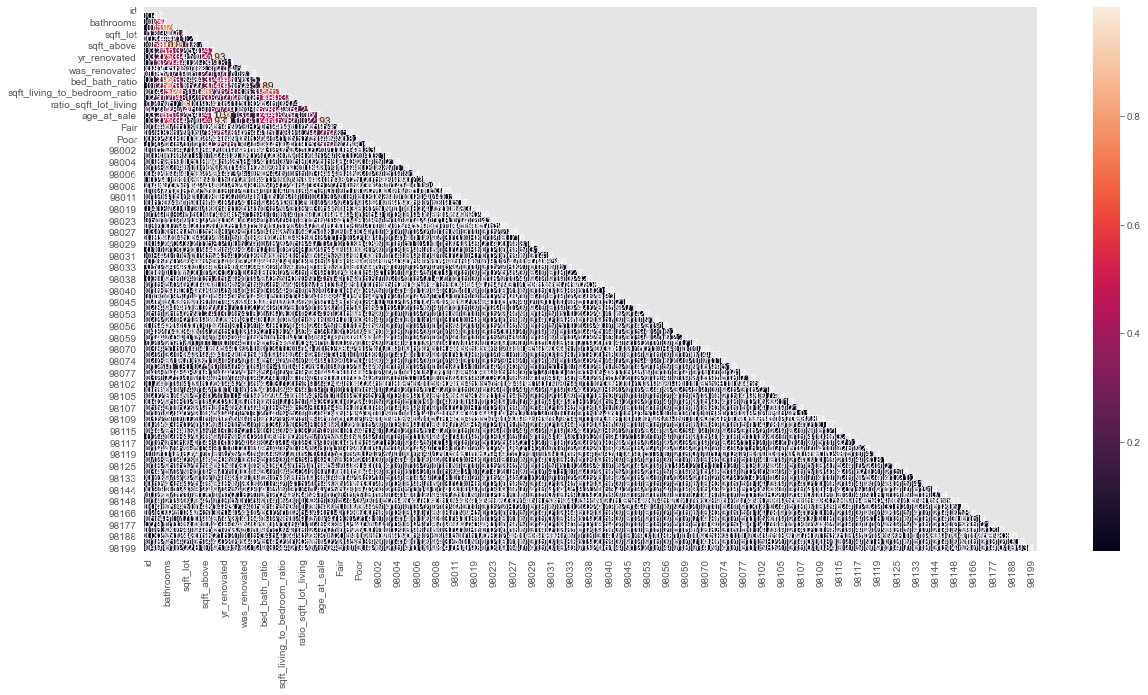

In [85]:
##trying to find a minimum 0.6 value to only show
mask = np.triu(np.ones_like(X_train.corr(), dtype=bool))

plt.figure(figsize=(20,10))

cor = X_train.corr().abs()
sns.heatmap(cor, mask=mask, annot=True);

- Using both the RFE and RFECV tell us something different. The RFE method says that the top 8 most significant         features are 
    1. age renovation at sale 
    2. sqft living space 
    3. age at sale
    4. year built 
    5. year renovated
    6. sq above
    7. sqft basement
    8. bedrooms
- now we know that the square footage features have multicollinearity among them, but sqft_living space is the feature that is most correlated with price. So we'll use that in our final model.
- we also can see that waterfront and the zip code feature are very relevant - with RFE each zipcode is treated as       a separate feature.
  features, but let's include them in our final model
- finally we know that bedrooms/bathrooms are important as well - lets go ahead an use ....bedrooms, bathroom, try       either ratio  


In [86]:
final_model = LinearRegression()
##performing 3 separate train/tets splits on our X_train, y_train
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)
#performing regression on all columns in our dataset
final_model_scores = cross_validate(
    estimator=final_model,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Final Model")
print("Train score:     ", final_model_scores["train_score"].mean())
print("Validation score:", final_model_scores["test_score"].mean())
print()
print("Multi Model 1")
print("Train score:     ", multi_model2_scores["train_score"].mean())
print("Validation score:", multi_model2_scores["test_score"].mean())
print()
print("Model 1")
print("Train score:     ", multi_model_scores["train_score"].mean())
print("Validation score:", multi_model_scores["test_score"].mean())
print()
print("Model 1B")
print("Train score:     ", multi_model_b_scores["train_score"].mean())
print("Validation score:", multi_model_b_scores["test_score"].mean())


Final Model
Train score:      0.8141529737928099
Validation score: 0.7905858558925428

Multi Model 1
Train score:      0.8141529737928099
Validation score: 0.7905858558925428

Model 1
Train score:      0.6334429950650038
Validation score: 0.6099003027567912

Model 1B
Train score:      0.57246679345766
Validation score: 0.5528461425859618


In [87]:
#lets take a look at multicollinearity using OLS
sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     703.2
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        03:09:20   Log-Likelihood:            -2.0276e+05
No. Observations:               15117   AIC:                         4.057e+05
Df Residuals:                   15025   BIC:                         4.064e+05
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.404e+05   1319.804    409.470      0.000    5.38e+05    5.43e+05
x1           161.5759   1380.866      0.117      0.907   -2545.090    2868.242
x2         -1.311e+05   4268.757    -30.719      0.000   -1.39e+05   -1.23e+05
x3          3.137e+04   7550.126      4.154      0.000    1.66e+04    4.62e+04
x4         -5.944e+15    9.2e+15     -0.646      0.518    -2.4e+16    1.21e+16
x5         -2.357e+04   3048.930     -7.730      0.000   -2.95e+04   -1.76e+04
x6          6.852e+04   1378.995     49.691      0.000    6.58e+04    7.12e+04
x7          5.343e+15   8.27e+15      0.646      0.518   -1.09e+16    2.16e+16
x8         -1.474e+17   2.28e+17     -0.646      0.518   -5.94e+17       3e+17
x9          1.452e+17   2.25e+17      0.646      0.518   -2.95e+17    5.85e+17
x10         2.877e+15   4.45e+15      0.646      0.518   -5.85e+15    1.16e+16
x11        -2362.9876   3316.822     -0.712      0.476   -8864.364    4138.388
x12        -1.969e+04   1536.303    -12.817      0.000   -2.27e+04   -1.67e+04
x13         1.122e+05   3872.977     28.961      0.000    1.05e+05     1.2e+05
x14        -3.107e+04   6147.035     -5.054      0.000   -4.31e+04    -1.9e+04
x15         4047.5241   7167.915      0.565      0.572      -1e+04    1.81e+04
x16        -1.138e+05   4650.158    -24.480      0.000   -1.23e+05   -1.05e+05
x17         3.289e+04   2950.988     11.146      0.000    2.71e+04    3.87e+04
x18        -2.494e+04   2009.875    -12.407      0.000   -2.89e+04    -2.1e+04
x19        -1.474e+17   2.28e+17     -0.646      0.518   -5.94e+17       3e+17
x20         1.452e+17   2.25e+17      0.646      0.518   -2.95e+17    5.86e+17
x21        -2033.4335   1339.410     -1.518      0.129   -4658.840     591.973
x22         1.207e+04   1518.485      7.950      0.000    9095.905     1.5e+04
x23        -3334.2481   1329.010     -2.509      0.012   -5939.269    -729.227
x24          1.81e+04   1480.433     12.223      0.000    1.52e+04     2.1e+04
x25         1714.1461   1660.055      1.033      0.302   -1539.764    4968.056
x26           76.1159   1792.676      0.042      0.966   -3437.748    3589.979
x27         9.348e+04   1798.796     51.968      0.000       9e+04     9.7e+04
x28         3.029e+04   1598.729     18.948      0.000    2.72e+04    3.34e+04
x29          4.94e+04   2050.110     24.098      0.000    4.54e+04    5.34e+04
x30         2.192e+04   1559.610     14.055      0.000    1.89e+04     2.5e+04
x31         3.324e+04   1768.680     18.793      0.000    2.98e+04    3.67e+04
x32         2598.7715   1475.605      1.761      0.078    -293.594    5491.138
x33         1.426e+04   1606.364      8.875      0.000    1.11e+04    1.74e+04
x34         6237.3949   1551.361      4.021      0.000    3196.537    9278.252
x35         5059.6834   1617.735      3.128      0.002    1888.725    8230.642
x3

In [88]:
sm.OLS(y_train, sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     703.7
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        03:09:21   Log-Likelihood:            -2.0275e+05
No. Observations:               15117   AIC:                         4.057e+05
Df Residuals:                   15025   BIC:                         4.064e+05
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -6.422e+07    5.7e+06    -11.260      0.000   -7.54e+07    -5.3e+07
id                             8.045e-08    4.8e-07      0.168      0.867    -8.6e-07    1.02e-06
bedrooms                      -1.442e+05   4690.885    -30.733      0.000   -1.53e+05   -1.35e+05
bathrooms                      4.132e+04   9795.411      4.218      0.000    2.21e+04    6.05e+04
sqft_living                     264.9279      5.813     45.577      0.000     253.534     276.321
sqft_lot                         -0.5612      0.072     -7.763      0.000      -0.703      -0.419
waterfront                     8.102e+05   1.63e+04     49.731      0.000    7.78e+05    8.42e+05
sqft_above                      159.7496      3.241     49.290      0.000     153.397     166.102
yr_built                       1.523e+04   1423.721     10.701      0.000    1.24e+04     1.8e+04
yr_renovated                   1.668e+04   1423.857     11.718      0.000    1.39e+04    1.95e+04
sqft_basement2                  104.8306      3.643     28.772      0.000      97.689     111.972
was_renovated                 -1.211e+04   1.83e+04     -0.661      0.509    -4.8e+04    2.38e+04
Distance_to_Water             -7.185e+04   5543.173    -12.962      0.000   -8.27e+04    -6.1e+04
bed_bath_ratio                 1.715e+05   5919.594     28.974      0.000     1.6e+05    1.83e+05
bath_bed_ratio                -1.452e+05   2.89e+04     -5.025      0.000   -2.02e+05   -8.85e+04
sqft_living_to_bedroom_ratio     18.4770     33.375      0.554      0.580     -46.941      83.895
sqft_living_to_bathroom_ratio  -392.5034     16.033    -24.481      0.000    -423.930    -361.076
ratio_sqft_lot_living          1567.5815    140.124     11.187      0.000    1292.921    1842.241
ratio_sqft_living_lot         -9.298e+04   7490.904    -12.413      0.000   -1.08e+05   -7.83e+04
age_at_sale                    1.661e+04   1422.677     11.678      0.000    1.38e+04    1.94e+04
age_renovation_at_sale         1.516e+04   1422.700     10.659      0.000    1.24e+04     1.8e+04
Fair                          -2.337e+04   1.52e+04     -1.536      0.125   -5.32e+04    6452.284
Good                           2.737e+04   3447.989      7.938      0.000    2.06e+04    3.41e+04
Poor                          -9.957e+04   3.96e+04     -2.512      0.012   -1.77e+05   -2.19e+04
Very Good                      6.669e+04   5432.672     12.276      0.000     5.6e+04    7.73e+04
98002                          1.801e+04    1.7e+04      1.057      0.291   -1.54e+04    5.14e+04
98003                           751.8356    1.5e+04      0.050      0.960   -2.86e+04    3.01e+04
98004                          7.913e+05   1.52e+04     51.985      0.000    7.61e+05    8.21e+05
98005                          3.443e+05   1.

In [ ]:
##checking model assumptions
p = sns.distplot(final_model.resid);
plt.xlabel("Residual Error", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
p.set_title("Distribution of Residual Error");

resid = final_model.resid

fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].hist(resid)
ax[0].set_xlabel("Residual Error")
ax[0].set_ylabel("Count")
ax[0].set_title(label="Histogram of Residual Error");

ax[1].scatter(x=final_model.fittedvalues,y=resid)
ax[1].set_xlabel("Predicted Values")
ax[1].set_ylabel("Residual Error")
ax[1].set_title(label="Test for Homoscedasticity")

plt.style.use('ggplot')
fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True);

In [ ]:
#Scoring our test sample


In [ ]:
##checking model assumptions
p = sns.distplot(final_model.resid);
plt.xlabel("Residual Error", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
p.set_title("Distribution of Residual Error");

resid = final_model.resid

fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].hist(resid)
ax[0].set_xlabel("Residual Error")
ax[0].set_ylabel("Count")
ax[0].set_title(label="Histogram of Residual Error");

ax[1].scatter(x=final_model.fittedvalues,y=resid)
ax[1].set_xlabel("Predicted Values")
ax[1].set_ylabel("Residual Error")
ax[1].set_title(label="Test for Homoscedasticity")

plt.style.use('ggplot')
fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True);

In [ ]:
#calculating root mean squared error.

## Conclusion

# STOP

In [ ]:
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

In [ ]:
plt.scatter(model.predict(df[x_cols]), model.resid)
plt.plot(model.predict(df[x_cols]), [0 for i in range(len(df))])


fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)


In [ ]:
pf = PolynomialFeatures(degree=2).fit(X_train) 
pf_train = pf.transform(X_train)

ss = StandardScaler()
ss.fit(pf_train)
train_scaled = ss.transform(pf_train)

lr = LinearRegression()
lr.fit(train_scaled,y_train)
lr.score(train_scaled, y_train)

pf_test = pf.transform(X_test)
test_scaled = ss.transform(pf_test)

lr.score(test_scaled, y_test)

In [ ]:
#simple_model_1_train_preds = simple_model.predict(sm.add_constant(X_train['sqft_living']))
#simple_model_1_train_preds
simple_train_preds = simple_model.predict(X_train['sqft_living'])

In [ ]:
#Plot our points, as a scatterplot
plt.scatter(train_df['sqft_living'], train_df['price'])

# Plot the line of best fit!
plt.plot(train_df['sqft_living'], simple_train_preds, color='black')

plt.ylabel('Home Sale Price')
plt.xlabel('Sqft_living')
plt.title('Relationship between Home Sale Price and Sqft living space')
plt.show()

In [ ]:
# One last thing - can visualize both train and test set!

# Plot our training data
plt.scatter(train_df['Rating'], train_df['Balance'], color='blue', label='Training')
# Plot our testing data
plt.scatter(test_df['Rating'], test_df['Balance'], color='green', label='Testing')


# Plot the line of best fit
plt.plot(train_df['Rating'], simple_train_preds, color='black')
# Plotting for the test data just to show it's the same!
plt.plot(test_df['Rating'], simple_test_preds, color='red')

plt.ylabel('Credit Card Balance')
plt.xlabel('Credit Rating')
plt.title('Relationship between Credit Rating and Credit Card Balance')
plt.legend()
plt.show()

In [ ]:
visualizer = ResidualsPlot(model, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [ ]:
#Model 2 - Simple Regression 2
simple_formula_2 = 'price ~ sqft_living15'
simple_model_2 = sm.formula.ols(formula=simple_formula_2, data=train_df)
simple_model_2summary = simple_model_2.fit().summary()

simple_model_2summary

In [ ]:
##input assumption visuals ## y_scaled= np.log(x)??

In [ ]:
cat_cols = [c for c in train_df.columns if train_df[c].dtype == 'O']
cat_cols

In [ ]:
train_df.columns

In [ ]:
# create an encoder object. This will help us to convert categorical variables to new columns
encoder = OneHotEncoder(handle_unknown='error',
                        drop='first', 
                        categories='auto')

ct = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],
                       remainder='passthrough')
ct.fit(X_train) 
X_train_enc = ct.transform(X_train)
X_test_enc = ct.transform(X_test)

In [ ]:
#create dummy variables for the "condition" column
condition_dummies = pd.get_dummies(X_train_condition['condition'], drop_first=True)
condition_dummies
#drops 'Average', creates 4 additional columns

In [ ]:
X_train_dummies = pd.concat([X_train_condition, condition_dummies], axis=1)
X_train_dummies

In [ ]:
#Model 3 - Multiple Regression 1
Multiple_formula = 'price ~ sqft_living + yr_built + Distance_to_Water + bed_bath_ratio'
Multiple_model = sm.formula.ols(formula=Multiple_formula, data=train_df)
Multiple_model_summary = Multiple_model.fit().summary()

Multiple_model_summary

In [ ]:
#Model 3 - Multiple Regression 2
#add in condition and zip code
Multiple_formula_2 = 'price ~ sqft_living + yr_built + Distance_to_Water + bed_bath_ratio'
Multiple_model_2 = sm.formula.ols(formula=Multiple_formula_2, data=train_df)
Multiple_model_2summary = Multiple_model_2.fit().summary()

Multiple_model_2summary

CODE

In [ ]:
sns.pairplot(housing)
plt.show()

In [ ]:
select.fit(X=cleaned_housing_scaled, y=cleaned_housing['price'])

In [ ]:
select.support_

In [ ]:
select.ranking_

In [ ]:
## use sqft_living  yr_built  sqft_living15  sqft_lot15

In [ ]:
Polynomials using all except categorical values

In [ ]:
X = cleaned_housing.drop('price', axis=1)
y = cleaned_housing['price']
pf = PolynomialFeatures(degree=3)
pf.fit(X)

In [ ]:
pf.transform(X)

In [ ]:
pf.transform(X).shape

In [ ]:
pf.get_feature_names()

In [ ]:
polynomial_df = pd.DataFrame(pf.transform(X), columns= pf.get_feature_names() )

In [ ]:
lr = LinearRegression()
lr.fit(polynomial_df, y)

In [ ]:
lr.score(polynomial_df, y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

In [ ]:
X = cleaned_housing['price']
y= cleaned_housing['sqft_living']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)
lr.coef_

In [ ]:
continuous = ['LotArea', '1stFlrSF', 'GrLivArea']
categoricals = ['BldgType', 'KitchenQual', 'Street']